In [3]:
import numpy as np
import matplotlib.pyplot as plt

---
### Load diabetes data set.

In [4]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
y -= y.mean()
features = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetesdf = pd.DataFrame(diabetes.data, columns=features)
diabetesdf.tail()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


---
### OLS regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

olsmodel = LinearRegression()
olsmodel.fit(X, y)
yfit = knnmodel.predict(X)

print("all MSE:", np.mean((y - yfit)**2))

results = cross_validate(olsmodel, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

ols_train_MSE = -results['train_score'].mean()
ols_test_MSE = -results['test_score'].mean()

print("train MSE:", ols_train_MSE)
print("test MSE:", ols_test_MSE)

all MSE: 2879.9858048908886
train MSE: 2852.5566887595296
test MSE: 3000.3810328390514


---
### K Nearest Neighbors (KNN) regression

In [32]:
from sklearn import neighbors

knnmodel = neighbors.KNeighborsRegressor(n_neighbors=3)
knnmodel.fit(X, y)
yfit = knnmodel.predict(X)

print("all MSE K=3:", np.mean((y - yfit)**2))

all MSE K=3: 1954.2812971342382


---
### How many neighbors should we consider? i.e. K = ?

In [23]:
Ks = range(1, 101)  # [1, 2, ..., 100]
MSE_train_vs_K = []
MSE_val_vs_K = []
for K in Ks:
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    results = cross_validate(model, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
    MSE_train_vs_K.append(-results['train_score'].mean())
    MSE_val_vs_K.append(-results['test_score'].mean())

best K: 19
best test MSE: 3238.9151860712386


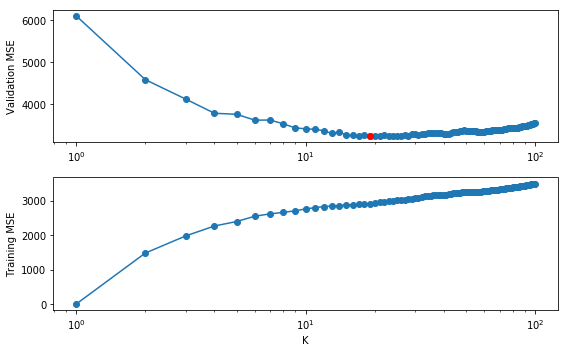

In [35]:
idx = np.argmin(MSE_val_vs_K)

print("best K:", Ks[idx])
print("best test MSE:", MSE_val_vs_K[idx])

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(Ks, MSE_val_vs_K, 'o-')
ax[0].plot(Ks[idx], MSE_val_vs_K[idx], 'ro')
ax[0].set_ylabel('Validation MSE');
ax[0].semilogx();

ax[1].plot(Ks, MSE_train_vs_K, 'o-')
ax[1].set_xlabel('K')
ax[1].set_ylabel('Training MSE');
ax[1].semilogx();

fig.tight_layout();

In [34]:
knnmodel = neighbors.KNeighborsRegressor(n_neighbors=19)
knnmodel.fit(X, y)
yfit = knnmodel.predict(X)

print("all MSE K=19:", np.mean((y - yfit)**2))

all MSE K=19: 2879.9858048908886


---
### Using GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 101)}
knnmodel = neighbors.KNeighborsRegressor()
cvmodel = GridSearchCV(knnmodel, params, cv=10, scoring='neg_mean_squared_error')
cvmodel.fit(X, y)
cvmodel.best_params_['n_neighbors']

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


19